<a href="https://colab.research.google.com/github/Karan6jaiswal/ECommerece/blob/main/progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving instance_images.zip to instance_images.zip
Saving train_dreambooth_lora.py to train_dreambooth_lora.py


In [5]:
import zipfile

with zipfile.ZipFile("instance_images.zip", 'r') as zip_ref:
    zip_ref.extractall("instance_images")


In [6]:
!pip install diffusers transformers accelerate datasets safetensors


In [7]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [8]:
!accelerate launch train_dreambooth_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --instance_data_dir="./instance_images" \
  --output_dir="./instance_images_output" \
  --instance_prompt="a Kolam art pattern" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --max_train_steps=1000 \
  --checkpointing_steps=250 \
  --use_8bit_adam


2025-09-28 08:23:35.037217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759047815.057479    2924 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759047815.063463    2924 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759047815.078623    2924 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759047815.078647    2924 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759047815.078651    2924 computation_placer.cc:177] computation placer alr

In [8]:
# Uninstall existing version
!pip uninstall -y diffusers

# Install latest development version from GitHub
!pip install git+https://github.com/huggingface/diffusers


Found existing installation: diffusers 0.35.1
Uninstalling diffusers-0.35.1:
  Successfully uninstalled diffusers-0.35.1
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-h7gaayjq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-h7gaayjq
  Resolved https://github.com/huggingface/diffusers to commit 041501aea92919c9c7f36e189fc9cf7d865ebb96
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4257843 sha256=79194fcafd655ecced5e6faa55f6ff2f8938925431316e59dae1108c91d962ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-o696qa_q/wheels/90/d4/44/a58bc00fb405fefb633b0d9d2307f6e3aec6cc1775d82555d3
Successfully built diffusers


In [4]:
from google.colab import files
uploaded = files.upload()


Saving train_dreambooth_lora.py to train_dreambooth_lora.py


In [7]:
!accelerate config default


accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [18]:
!accelerate launch train_dreambooth_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --instance_data_dir="./instance_images/instance_images" \
  --output_dir="./instance_images_output" \
  --instance_prompt="a Kolam art pattern" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --max_train_steps=1000 \
  --checkpointing_steps=250

2025-09-28 12:05:05.242508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759061105.262765    7123 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759061105.268792    7123 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759061105.284778    7123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759061105.284805    7123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759061105.284809    7123 computation_placer.cc:177] computation placer alr

In [19]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.load_lora_weights("./instance_images_output")
pipe.to("cuda")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.36.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [20]:
prompt = "a Kolam art pattern, symmetrical white lines on black background"
image = pipe(prompt, guidance_scale=7.5).images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

In [21]:
image.save("kolam_sample.png")

from google.colab import files
files.download("kolam_sample.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

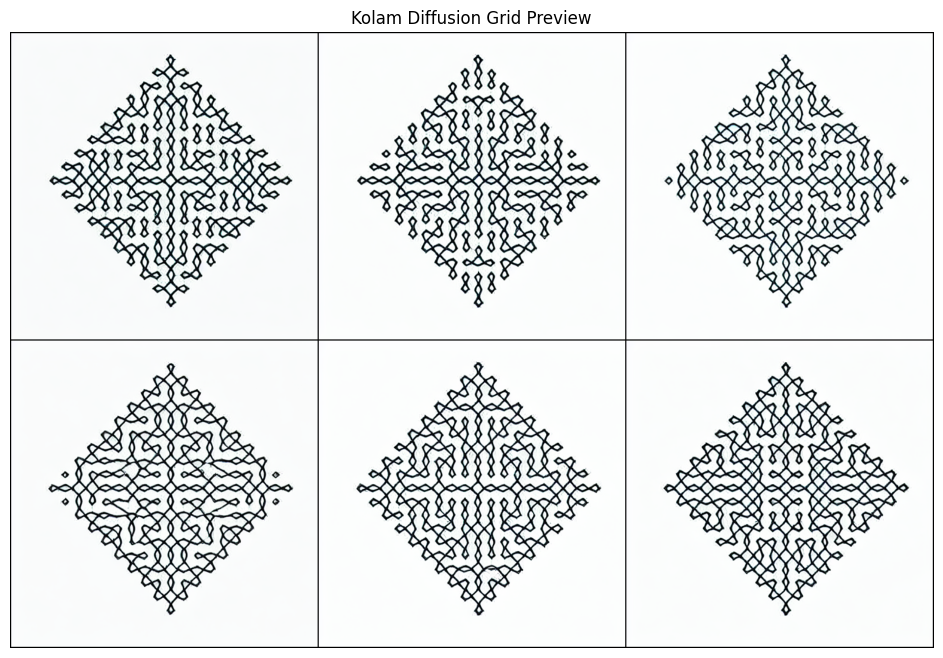

In [22]:
from torchvision.utils import make_grid
import torchvision.transforms as T
import matplotlib.pyplot as plt

images = [pipe(prompt, guidance_scale=7.5).images[0] for _ in range(6)]
tensor_images = [T.ToTensor()(img) for img in images]
grid = make_grid(tensor_images, nrow=3)

plt.figure(figsize=(12, 8))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Kolam Diffusion Grid Preview")
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

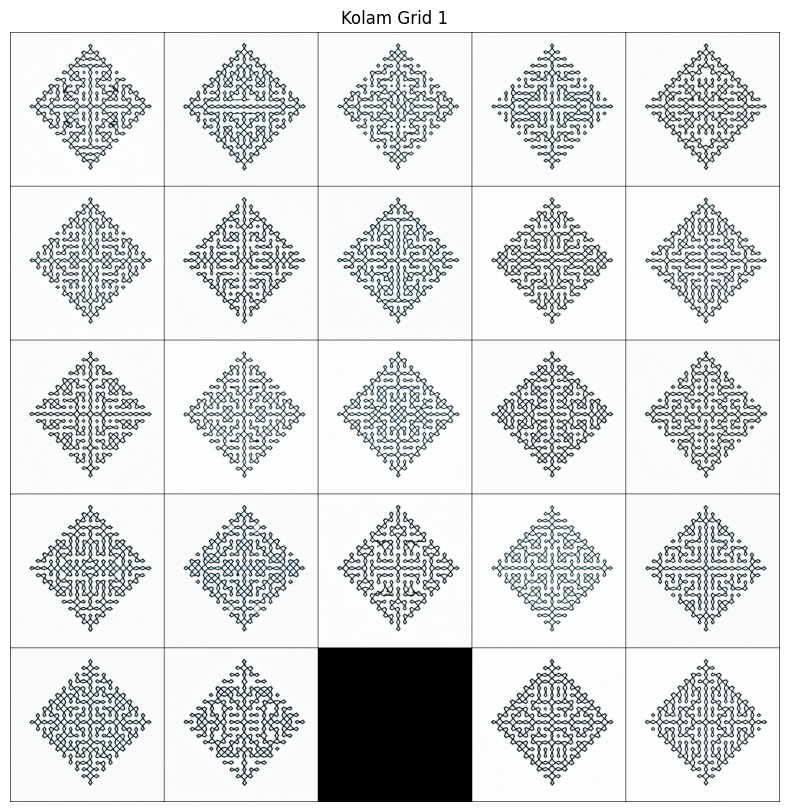

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

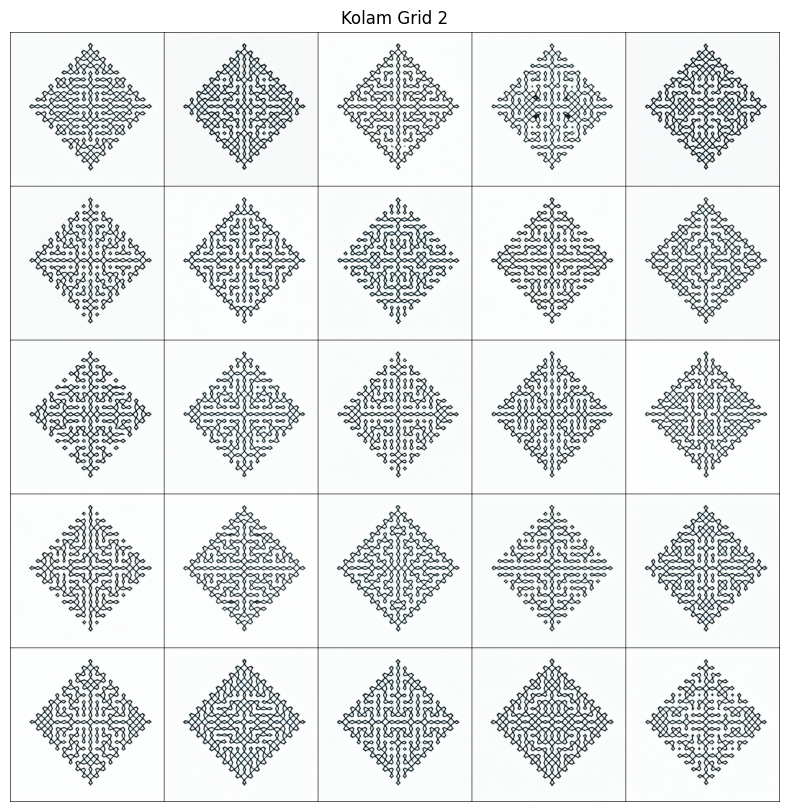

In [23]:
from torchvision.utils import make_grid
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os

# Create output folder
os.makedirs("kolam_grids", exist_ok=True)

prompt = "a Kolam art pattern, symmetrical white lines on black background"
num_images = 50
batch_size = 25
nrow = 5  # 5 images per row

for i in range(0, num_images, batch_size):
    images = [pipe(prompt, guidance_scale=7.5).images[0] for _ in range(batch_size)]
    tensor_images = [T.ToTensor()(img) for img in images]
    grid = make_grid(tensor_images, nrow=nrow)

    plt.figure(figsize=(15, 10))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis("off")
    plt.title(f"Kolam Grid {i//batch_size + 1}")
    plt.savefig(f"kolam_grids/grid_{i//batch_size + 1}.png")
    plt.show()
